In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinas_AutoInt as ru

from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
####
# n0
datan0, Autn0 = np.load('AutovN0.npy', allow_pickle=True)
datan0P, Autn0P = np.load('AutovN0P.npy', allow_pickle=True)
datan0N, Autn0N = np.load('AutovN0M.npy', allow_pickle=True)

# n1
datan1, Autn1 = np.load('AutovN1.npy', allow_pickle=True)
datan1P, Autn1P = np.load('AutovN1P.npy', allow_pickle=True)
datan1N, Autn1N = np.load('AutovN1M.npy', allow_pickle=True)

# n2
datan2, Autn2 = np.load('AutovN2.npy', allow_pickle=True)
datan2P, Autn2P = np.load('AutovN2P.npy', allow_pickle=True)
datan2PE, Autn2PE = np.load('AutovN2PL0_2.npy', allow_pickle=True)
datan2N, Autn2N = np.load('AutovN2M.npy', allow_pickle=True)

In [5]:
datan2PEx = np.concatenate([datan2P, datan2PE])
Autn2PEx = np.concatenate([Autn2P, Autn2PE])

In [6]:
##### n=1 #####
Sig0R99M99Energyn1 = np.load('/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/Datos/fondo_n1/Sig0R99M99EnergyT_n1.npz', allow_pickle=True)
Sig0R99M99Energy1 = Sig0R99M99Energyn1['arr_0']

solPlotAu = [[8.5, 10.813496185389234, 1, 0, 1, 1.14853599, 'DOP853', 1e-13, 1e-15, 10.284651516823958],
[9.0, 10.964417071053244, 1, 0, 1, 1.11617635, 'DOP853', 1e-13, 1e-15, 10.88963101781359],
[9.5, 10.500023492918213, 1, 0, 1, 1.08640629, 'DOP853', 1e-13, 1e-15, 11.494610518803247],
[10.0, 10.038176836185638, 1, 0, 1, 1.05889786, 'DOP853', 1e-13, 1e-15, 12.09959001979289],
[10.5, 9.965562265390512, 1, 0, 1, 1.0333785, 'DOP853', 1e-13, 1e-15, 12.704569520782526]]

######  n=2 #####
Sig0R99M99Energyn2 = np.load('/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/Datos/fondo_n2/Sig0R99M99EnergyT_n2.npz', allow_pickle=True)
Sig0R99M99Energy2 = Sig0R99M99Energyn2['arr_0']

soln2Fond = [# Lambda=0
   [1e-05, 9333.411577892608, 1, 0, 2, [964.38548042, 2327.72416625], 'DOP853', 1e-13, 1e-15, 1.3437006489512981e-05],
  [5e-05, 4255.989923520135, 1, 0, 2, [431.28629806, 1040.98989328], 'DOP853', 1e-13, 1e-15, 6.718503246339977e-05],
  [0.0001, 3111.8959154633785, 1, 0, 2, [304.96546594, 736.09101236], 'DOP853', 1e-13, 1e-15, 0.00013437006495917972],
  [0.0005, 1425.2922666964648, 1, 0, 2, [136.38470253, 329.18990829], 'DOP853', 1e-13, 1e-15, 0.0006718503247548905],
  [0.001, 1019.4585940330307, 1, 0, 2, [96.43854801, 232.77241644], 'DOP853', 1e-13, 1e-15, 0.0013437006495421616],
  [0.005, 473.35248865248855, 1, 0, 2, [43.1286298, 104.09898929], 'DOP853', 1e-13, 1e-15, 0.0067185032476413786],
  [0.01, 338.0660915998275, 1, 0, 2, [30.49654659,  73.60910124], 'DOP853', 1e-13, 1e-15, 0.013437006495315134],
  [0.05, 158.3914761939716, 1, 0, 2, [13.63847025, 32.91899083], 'DOP853', 1e-13, 1e-15, 0.06718503247650628],
  [0.1, 113.23260194083853, 1, 0, 2, [9.6438548 , 23.27724164], 'DOP853', 1e-13, 1e-15, 0.13437006495301645],
  [0.5, 51.532832680236766, 1, 0, 2, [4.31286298, 10.40989893], 'DOP853', 1e-13, 1e-15, 0.6718503247650982],
  [1.0, 38.11449529107205, 1, 0, 2, [3.04965466, 7.36091012], 'DOP853', 1e-13, 1e-15, 1.3437006495302173],
  [1.25, 33.21464461837912, 1, 0, 2, [2.72769405,  6.58379817], 'DOP853', 1e-13, 1e-15, 1.6796258119127854],
  [1.5, 31.005100848245743, 1, 0, 2, [2.4900326, 6.01015795], 'DOP853', 1e-13, 1e-15, 2.0155509742953326],
  [1.75, 28.46278370670966, 1, 0, 2, [2.30532223, 5.56432503], 'DOP853', 1e-13, 1e-15, 2.351476136677876],
  [2.0, 26.556575185835122, 1, 0, 2, [ 2.15643149, 5.20494946], 'DOP853', 1e-13, 1e-15, 2.687401299060446],
  [2.25, 25.372518322541143, 1, 0, 2, [2.03310311, 4.90727342], 'DOP853', 1e-13, 1e-15, 3.0233264614429913],
  [2.5, 23.616993626356095, 1, 0, 2, [1.92877096,  4.65544833], 'DOP853', 1e-13, 1e-15, 3.3592516238255596],
  [2.75, 23.087995285752474, 1, 0, 2, [1.83901095, 4.43879582], 'DOP853', 1e-13, 1e-15, 3.695176786208105],
  [3.0, 22.2106196075677, 1, 0, 2, [1.76071894, 4.24982344], 'DOP853', 1e-13, 1e-15, 4.031101948590654],
  [3.25, 21.071331257346444, 1, 0, 2, [1.69164404, 4.08309829], 'DOP853', 1e-13, 1e-15, 4.367027110973219],
  [3.5, 20.876549301916707, 1, 0, 2, [1.63010898, 3.93457196], 'DOP853', 1e-13, 1e-15, 4.702952273355763],
  [3.75, 19.633160079346723, 1, 0, 2, [1.57483489, 3.80115764], 'DOP853', 1e-13, 1e-15, 5.0388774357383115],
  [4.0, 18.942380349596185, 1, 0, 2, [1.52482733, 3.68045506], 'DOP853', 1e-13, 1e-15, 5.374802598120881],
  [4.25, 18.67594619891718, 1, 0, 2, [1.4792998, 3.57056588], 'DOP853', 1e-13, 1e-15, 5.710727760503427],
  [4.5, 18.220649060353782, 1, 0, 2, [1.43762099, 3.46996631], 'DOP853', 1e-13, 1e-15, 6.046652922885972],
  [4.75, 18.007266251343044, 1, 0, 2, [1.39927752, 3.3774172], 'DOP853', 1e-13, 1e-15, 6.3825780852685385],
  [5.0, 17.367868579170636, 1, 0, 2, [1.36384703, 3.29189908], 'DOP853', 1e-13, 1e-15, 6.718503247651108],
  [5.25, 16.41524464106073, 1, 0, 2, [1.33097841, 3.21256456], 'DOP853', 1e-13, 1e-15, 7.054428410033669],
  [5.5, 17.312579884262366, 1, 0, 2, [1.30037712, 3.13870262], 'DOP853', 1e-13, 1e-15, 7.390353572416213],
  [5.75, 16.26175942529496, 1, 0, 2, [1.27179391, 3.06971172], 'DOP853', 1e-13, 1e-15, 7.726278734798758],
  [6.0, 15.30616239398425, 1, 0, 2, [1.2450163, 3.00507897], 'DOP853', 1e-13, 1e-15, 8.062203897181337],
  [6.25, 15.081065855867552, 1, 0, 2, [1.21986186, 2.94436405], 'DOP853', 1e-13, 1e-15, 8.398129059563882],
  [6.5, 15.02039742163048, 1, 0, 2, [1.19617297, 2.88718649], 'DOP853', 1e-13, 1e-15, 8.734054221946426],
  [6.75, 14.801211034145751, 1, 0, 2, [1.17381263, 2.83321563], 'DOP853', 1e-13, 1e-15, 9.06997938432897],
  [7.0, 14.456787174523035, 1, 0, 2, [1.15266112, 2.78216252], 'DOP853', 1e-13, 1e-15, 9.405904546711515],
  [7.25, 14.492607835896793, 1, 0, 2, [1.13261331, 2.73377339], 'DOP853', 1e-13, 1e-15, 9.741829709094095],
  [7.5, 14.254005668164396, 1, 0, 2, [1.11357643,  2.68782435], 'DOP853', 1e-13, 1e-15, 10.077754871476639],
  [7.75, 13.706377598109935, 1, 0, 2, [1.09546829, 2.64411697], 'DOP853', 1e-13, 1e-15, 10.413680033859183],
  [8.0, 13.978495186428585, 1, 0, 2, [ 1.07821574,  2.60247473], 'DOP853', 1e-13, 1e-15, 10.749605196241763],
  [8.25, 13.599590384592744, 1, 0, 2, [1.06175347, 2.56273996], 'DOP853', 1e-13, 1e-15, 11.085530358624307],
  [8.5, 13.120366671881595, 1, 0, 2, [1.04602292, 2.52477134], 'DOP853', 1e-13, 1e-15, 11.421455521006852],
  [8.75, 12.855881950395018, 1, 0, 2, [1.03097144, 2.4884418], 'DOP853', 1e-13, 1e-15, 11.757380683389396],
  [9.0, 12.832772140440234, 1, 0, 2, [1.01655155, 2.45363671], 'DOP853', 1e-13, 1e-15, 12.093305845771976],
  [9.25, 12.572567117268132, 1, 0, 2, [1.00272028, 2.42025234], 'DOP853', 1e-13, 1e-15, 12.42923100815452],
  [9.5, 12.178183039171508, 1, 0, 2, [0.98943863, 2.3881946], 'DOP853', 1e-13, 1e-15, 12.7651561705371],
  [9.75, 12.209475342305684, 1, 0, 2, [0.97667114, 2.3573779], 'DOP853', 1e-13, 1e-15, 13.101081332919644],
  [10, 12.017467539040876, 1, 0, 2, [0.96438548, 2.32772416], 'DOP853', 1e-13, 1e-15, 13.437006495302205],
  [10.25, 11.936559566510084, 1, 0, 2, [0.95255208, 2.29916205], 'DOP853', 1e-13, 1e-15, 13.77293165768472],
  [10.5, 12.146973034045487, 1, 0, 2, [0.94114386, 2.27162618], 'DOP853', 1e-13, 1e-15, 14.108856820067293],
  [10.75, 11.688672457262918, 1, 0, 2, [0.93013595, 2.24505654], 'DOP853', 1e-13, 1e-15, 14.44478198244986],
  [11.0, 11.564962717248092, 1, 0, 2, [ 0.91950548, 2.21939791], 'DOP853', 1e-13, 1e-15, 14.780707144832425],
  [11.25, 11.899207747138082, 1, 0, 2, [0.90923135, 2.19459939], 'DOP853', 1e-13, 1e-15, 15.116632307214976],
  [11.5, 11.502904664631586, 1, 0, 2, [0.8992941, 2.17061398], 'DOP853', 1e-13, 1e-15, 15.45255746959752],
  [11.75, 12.097783632100569, 1, 0, 2, [0.8896757, 2.14739819], 'DOP853', 1e-13, 1e-15, 15.788482631980068],
  [12.0, 11.008128457603434, 1, 0, 2, [0.88035947, 2.12491172], 'DOP853', 1e-13, 1e-15, 16.12440779436261],
  [12.25, 10.80245758772561, 1, 0, 2, [0.8713299, 2.10311718], 'DOP853', 1e-13, 1e-15, 16.460332956745205],
  [12.5, 10.933947986191834, 1, 0, 2, [0.8625726, 2.08197979], 'DOP853', 1e-13, 1e-15, 16.796258119127735],
  [12.75, 10.807056823687867, 1, 0, 2, [0.85407414, 2.06146717], 'DOP853', 1e-13, 1e-15, 17.1321832815103],
  [13.0, 10.537857919740029, 1, 0, 2, [0.84582202, 2.04154915], 'DOP853', 1e-13, 1e-15, 17.468108443892874],
  [13.25, 10.600087241229893, 1, 0, 2, [0.83780457, 2.02219753], 'DOP853', 1e-13, 1e-15, 17.80403360627543],
  [13.5, 10.416199734784017, 1, 0, 2, [0.83001087, 2.00338598], 'DOP853', 1e-13, 1e-15, 18.139958768657966],
  [13.75, 10.274002686800387, 1, 0, 2, [0.8224307, 1.98508984], 'DOP853', 1e-13, 1e-15, 18.475883931040517],
  [14.0, 10.298619686385022, 1, 0, 2, [ 0.81505449,  1.96728598], 'DOP853', 1e-13, 1e-15, 18.811809093423054],
  [14.25, 10.00634232558845, 1, 0, 2, [0.80787325, 1.94995273], 'DOP853', 1e-13, 1e-15, 19.1477342558056],
  [14.5, 10.113423297140953, 1, 0, 2, [0.80087855, 1.9330697], 'DOP853', 1e-13, 1e-15, 19.48365941818817],
  [14.75, 9.971483803371635, 1, 0, 2, [0.79406244, 1.91661775], 'DOP853', 1e-13, 1e-15, 19.819584580570723],
  [15.0, 9.955540105875981, 1, 0, 2, [0.78741745, 1.90057882], 'DOP853', 1e-13, 1e-15, 20.155509742953296],
  [15.25, 9.64891619803723, 1, 0, 2, [0.78093653, 1.88493593], 'DOP853', 1e-13, 1e-15, 20.49143490533587],
  [15.5, 9.908222140873823, 1, 0, 2, [0.77461306, 1.86967304], 'DOP853', 1e-13, 1e-15, 20.8273600677184],
  [15.75, 9.717953101288886, 1, 0, 2, [0.76844074, 1.85477501], 'DOP853', 1e-13, 1e-15, 21.16328523010095]
 ]

In [7]:
ModoEsca = lambda M, lval: lval*M**2

#### n=1
ModoInesN1Lamb0 = 0.00148347+0.00979587j
datosEscan1 = []
for i in range(len(Sig0R99M99Energy1)):
    temp = ModoEsca(Sig0R99M99Energy1[i, 2], ModoInesN1Lamb0)
    datosEscan1.append([Sig0R99M99Energy1[i, 0], temp])

for i in solPlotAu:
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(i)
    temp = ModoEsca(Mas, ModoInesN1Lamb0)
    datosEscan1.append([sD[0], temp])

datosEsca = np.array(datosEscan1)

#### n=2
ModoInesN2Lamb0_1 = 0.00037420+0.00507753j
ModoInesN2Lamb0_2 = 0.00051995+0.00225911j

datMas2 = []
for i in soln2Fond:
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(i)
    datMas2.append([sD[0], Mas])

datosEsca1, datosEsca2 = [], []
for i in datMas2:
    s0, Mas = i
    temp = ModoEsca(Mas, ModoInesN2Lamb0_1)
    temp2 = ModoEsca(Mas, ModoInesN2Lamb0_2)
    datosEsca1.append([s0, temp])
    datosEsca2.append([s0, temp2])

datosEsca1 = np.array(datosEsca1)
datosEsca2 = np.array(datosEsca2)

In [8]:
def datoejes(datosA, datosS0, dec=9, out=2):
    datp1, datp2, datp3 = [], [], []
    Mdatp1, Mdatp2, Mdatp3 = [], [], []
    ncasos = len(datosS0)
    for i in range(ncasos):
        x = float(datosS0[i])
        y = datosA[i]
        temp = ru.roundElem(y, dec=dec) # roundElem(dat, dec=10)
        if temp is not None:
            if len(temp[0])==2:
                t1, t2 = temp[0]
                if len(temp[1])!=2:
                    #print(temp[1])
                    dattemp = float(temp[1])
                    i1, i2 = dattemp, dattemp
                else:
                    i1, i2 = temp[1]
                datp1.append([x, t1, i1])
                datp2.append([x, t2, i2])
                Mdatp1.append([x, -t1, i1])
                Mdatp2.append([x, -t2, i2])
            elif len(temp[0])==1:
                t2, = temp[0]
                i2, = temp[1]
                datp1.append([x, None, None])
                datp2.append([x, t2, i2])
                Mdatp1.append([x, None, None])
                Mdatp2.append([x, -t2, i2])
            elif len(temp[0])==3 and out==3:
                t1, t2, t3 = temp[0]
                if len(temp[1])!=3:
                    #print(temp[1])
                    #print(temp[0])
                    dattemp = float(temp[1][0])
                    i1, i2, i3 = dattemp, dattemp, temp[1][1]
                else:
                    i1, i2, i3 = temp[1]
                datp1.append([x, t1, i1])
                datp2.append([x, t2, i2])
                datp3.append([x, t3, i3])
                Mdatp1.append([x, -t1, i1])
                Mdatp2.append([x, -t2, i2])
                Mdatp3.append([x, -t3, i3])
            elif len(temp[0])>3:
                pass
        else:
            datp1.append([x, None, None])
            datp2.append([x, None, None])
            datp3.append([x, None, None])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, None, None])
            Mdatp3.append([x, None, None])

    if out==2:
        return datp1, datp2, Mdatp1, Mdatp2
    else:
        return datp1, datp2, datp3, Mdatp1, Mdatp2, Mdatp3   

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_13705/522749616.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),
/Users/armando/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.2, -0.42, '$\\sigma_0^{M^{\\mathrm{max}}_{99}}\\approx1.0$')

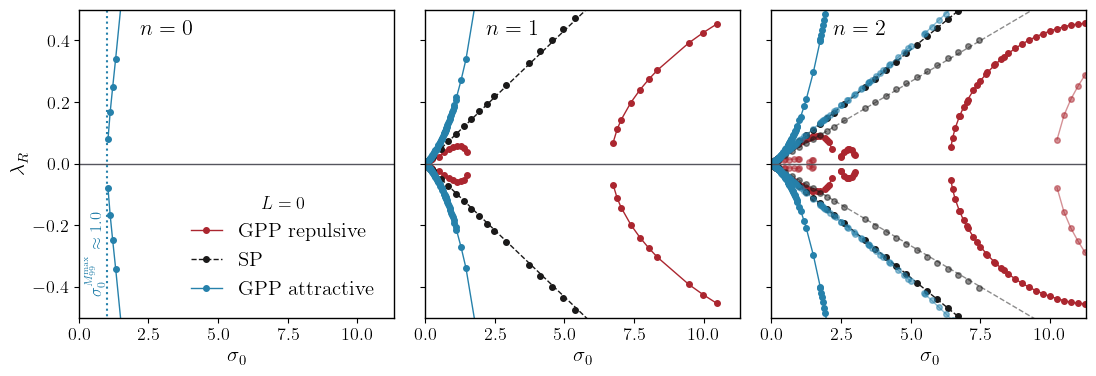

In [40]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.1))

####
#datn01, datn02, Mdatn01, Mdatn02 = datoejes(Autn0, datan0)
#datn01P, datn02P, Mdatn01P, Mdatn02P = datoejes(Autn0P, datan0P)
datn01N, datn02N, Mdatn01N, Mdatn02N = datoejes(Autn0N, datan0N[:-2])

datn01N = np.array(datn01N)
datn02N = np.array(datn02N)
Mdatn01N = np.array(Mdatn01N)
Mdatn02N = np.array(Mdatn02N)

ax[0].plot(datn01N[:, 0], datn01N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[0].plot(datn02N[:, 0], datn02N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[0].plot(Mdatn01N[:, 0], Mdatn01N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[0].plot(Mdatn02N[:, 0], Mdatn02N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)

ax[0].plot([], [], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1, label=r'GPP repulsive') 
ax[0].plot([], [], lw=1, ls='--', color=col[0], marker='o', markersize=4, alpha=1, label=r'SP')
ax[0].plot([], [], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1, label=r'GPP attractive')

############################
datn11P, datn12P, Mdatn11P, Mdatn12P = datoejes(Autn1P, datan1P)
datn11, datn12, Mdatn11, Mdatn12 = datoejes(Autn1, datan1)
datn11N, datn12N, Mdatn11N, Mdatn12N = datoejes(Autn1N, datan1N)

##
datn11P = np.array(datn11P)
datn12P = np.array(datn12P)
Mdatn11P = np.array(Mdatn11P)
Mdatn12P = np.array(Mdatn12P)

ax[1].plot(datn11P[:, 0], datn11P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12P[:, 0], datn12P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11P[:, 0], Mdatn11P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12P[:, 0], Mdatn12P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)

##
datn11 = np.array(datn11)
datn12 = np.array(datn12)
Mdatn11 = np.array(Mdatn11)
Mdatn12 = np.array(Mdatn12)

ax[1].plot(datn11[:, 0], datn11[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12[:, 0], datn12[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11[:, 0], Mdatn11[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12[:, 0], Mdatn12[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)

# escalamiento
ax[1].plot(datosEsca[:, 0], np.real(datosEsca[:,1]), ls='--', lw=1, c=col[0])
ax[1].plot(datosEsca[:, 0], -np.real(datosEsca[:,1]), ls='--', lw=1, c=col[0])

##
datn11N = np.array(datn11N)
datn12N = np.array(datn12N)
Mdatn11N = np.array(Mdatn11N)
Mdatn12N = np.array(Mdatn12N)

ax[1].plot(datn11N[:, 0], datn11N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12N[:, 0], datn12N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11N[:, 0], Mdatn11N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12N[:, 0], Mdatn12N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
#ax[1].plot([], [], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1, label=r'GPP attractive')

############################
#datn21P, datn22P, Mdatn21P, Mdatn22P = datoejes(Autn2P, datan2P)
datn21P, datn22P, Mdatn21P, Mdatn22P = datoejes(Autn2PEx, datan2PEx)
datn21, datn22, Mdatn21, Mdatn22 = datoejes(Autn2, datan2)
datn21N, datn22N, Mdatn21N, Mdatn22N = datoejes(Autn2N, datan2N)

##
datn21P = np.array(datn21P)
datn22P = np.array(datn22P)
Mdatn21P = np.array(Mdatn21P)
Mdatn22P = np.array(Mdatn22P)

ax[2].plot(datn21P[:, 0], datn21P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22P[:, 0], datn22P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21P[:, 0], Mdatn21P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22P[:, 0], Mdatn22P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)

##
datn21 = np.array(datn21)
datn22 = np.array(datn22)
Mdatn21 = np.array(Mdatn21)
Mdatn22 = np.array(Mdatn22)

ax[2].plot(datn21[:, 0], datn21[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22[:, 0], datn22[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21[:, 0], Mdatn21[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22[:, 0], Mdatn22[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)

# escalamiento
ax[2].plot(datosEsca1[:, 0], np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)
ax[2].plot(datosEsca1[:, 0], -np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)
ax[2].plot(datosEsca2[:, 0], np.real(datosEsca2[:,1]), ls='--', lw=1, c=col[0], alpha=1)
ax[2].plot(datosEsca2[:, 0], -np.real(datosEsca2[:,1]), ls='--', lw=1, c=col[0], alpha=1)

##
datn21N = np.array(datn21N)
datn22N = np.array(datn22N)
Mdatn21N = np.array(Mdatn21N)
Mdatn22N = np.array(Mdatn22N)

ax[2].plot(datn21N[:, 0], datn21N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22N[:, 0], datn22N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21N[:, 0], Mdatn21N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22N[:, 0], Mdatn22N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
#ax[2].plot([], [], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)

############################

ax[0].set_xlim(0, 11.3)#11.3
ax[1].set_xlim(0, 11.3)
ax[2].set_xlim(0, 11.3)
ax[0].set_ylim(-0.5, 0.5)

ax[0].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')
ax[1].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')
ax[2].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')

ax[0].legend(loc='lower right', frameon=False, title=r'$L=0$')

ax[0].set_ylabel(r'$\lambda_{R}$')
ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')
ax[2].set_xlabel(r'$\sigma_0$')

####
ax[0].text(x=2.2, y=0.42, s=r'$n=0$')
ax[1].text(x=2.2, y=0.42, s=r'$n=1$')
ax[2].text(x=2.2, y=0.42, s=r'$n=2$')

ax[0].vlines(x=1.0, ymin=-5, ymax=5, ls=':', lw=1.5, color=col[2])
ax[0].text(x=0.2, y=-0.42, s=r'$\sigma_0^{M^{\mathrm{max}}_{99}}\approx1.0$', color=col[2], rotation=90, fontsize=12)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_13705/1454664219.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),


Text(0.2, -0.42, '$\\sigma_0^{M^{\\mathrm{max}}_{99}}$')

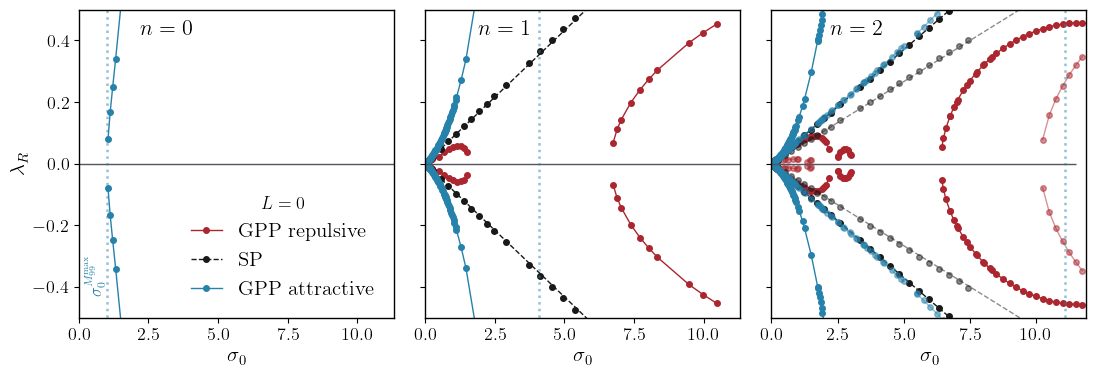

In [44]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.1))

####
#datn01, datn02, Mdatn01, Mdatn02 = datoejes(Autn0, datan0)
#datn01P, datn02P, Mdatn01P, Mdatn02P = datoejes(Autn0P, datan0P)
datn01N, datn02N, Mdatn01N, Mdatn02N = datoejes(Autn0N, datan0N[:-2])

datn01N = np.array(datn01N)
datn02N = np.array(datn02N)
Mdatn01N = np.array(Mdatn01N)
Mdatn02N = np.array(Mdatn02N)

ax[0].plot(datn01N[:, 0], datn01N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[0].plot(datn02N[:, 0], datn02N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[0].plot(Mdatn01N[:, 0], Mdatn01N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[0].plot(Mdatn02N[:, 0], Mdatn02N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)

ax[0].plot([], [], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1, label=r'GPP repulsive') 
ax[0].plot([], [], lw=1, ls='--', color=col[0], marker='o', markersize=4, alpha=1, label=r'SP')
ax[0].plot([], [], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1, label=r'GPP attractive')

############################
datn11P, datn12P, Mdatn11P, Mdatn12P = datoejes(Autn1P, datan1P)
datn11, datn12, Mdatn11, Mdatn12 = datoejes(Autn1, datan1)
datn11N, datn12N, Mdatn11N, Mdatn12N = datoejes(Autn1N, datan1N)

##
datn11P = np.array(datn11P)
datn12P = np.array(datn12P)
Mdatn11P = np.array(Mdatn11P)
Mdatn12P = np.array(Mdatn12P)

ax[1].plot(datn11P[:, 0], datn11P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12P[:, 0], datn12P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11P[:, 0], Mdatn11P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12P[:, 0], Mdatn12P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)

##
datn11 = np.array(datn11)
datn12 = np.array(datn12)
Mdatn11 = np.array(Mdatn11)
Mdatn12 = np.array(Mdatn12)

ax[1].plot(datn11[:, 0], datn11[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12[:, 0], datn12[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11[:, 0], Mdatn11[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12[:, 0], Mdatn12[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)

# escalamiento
ax[1].plot(datosEsca[:, 0], np.real(datosEsca[:,1]), ls='--', lw=1, c=col[0])
ax[1].plot(datosEsca[:, 0], -np.real(datosEsca[:,1]), ls='--', lw=1, c=col[0])

##
datn11N = np.array(datn11N)
datn12N = np.array(datn12N)
Mdatn11N = np.array(Mdatn11N)
Mdatn12N = np.array(Mdatn12N)

ax[1].plot(datn11N[:, 0], datn11N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12N[:, 0], datn12N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11N[:, 0], Mdatn11N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12N[:, 0], Mdatn12N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
#ax[1].plot([], [], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1, label=r'GPP attractive')

############################
# datn21P, datn22P, Mdatn21P, Mdatn22P = datoejes(Autn2P, datan2P)
datn21P, datn22P, Mdatn21P, Mdatn22P = datoejes(Autn2PEx, datan2PEx)
datn21, datn22, Mdatn21, Mdatn22 = datoejes(Autn2, datan2)
datn21N, datn22N, Mdatn21N, Mdatn22N = datoejes(Autn2N, datan2N)

##
datn21P = np.array(datn21P)
datn22P = np.array(datn22P)
Mdatn21P = np.array(Mdatn21P)
Mdatn22P = np.array(Mdatn22P)

ax[2].plot(datn21P[:, 0], datn21P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22P[:, 0], datn22P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21P[:, 0], Mdatn21P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22P[:, 0], Mdatn22P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)

##
datn21 = np.array(datn21)
datn22 = np.array(datn22)
Mdatn21 = np.array(Mdatn21)
Mdatn22 = np.array(Mdatn22)

ax[2].plot(datn21[:, 0], datn21[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22[:, 0], datn22[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21[:, 0], Mdatn21[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22[:, 0], Mdatn22[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)

# escalamiento
ax[2].plot(datosEsca1[:, 0], np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)
ax[2].plot(datosEsca1[:, 0], -np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)
ax[2].plot(datosEsca2[:, 0], np.real(datosEsca2[:,1]), ls='--', lw=1, c=col[0], alpha=1)
ax[2].plot(datosEsca2[:, 0], -np.real(datosEsca2[:,1]), ls='--', lw=1, c=col[0], alpha=1)

##
datn21N = np.array(datn21N)
datn22N = np.array(datn22N)
Mdatn21N = np.array(Mdatn21N)
Mdatn22N = np.array(Mdatn22N)

ax[2].plot(datn21N[:, 0], datn21N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22N[:, 0], datn22N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21N[:, 0], Mdatn21N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22N[:, 0], Mdatn22N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
#ax[2].plot([], [], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)

############################

ax[0].set_xlim(0, 11.3)#11.3
ax[1].set_xlim(0, 11.3)
ax[2].set_xlim(0, 11.9)
ax[0].set_ylim(-0.5, 0.5)

ax[0].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')
ax[1].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')
ax[2].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')

ax[0].legend(loc='lower right', frameon=False, title=r'$L=0$')

ax[0].set_ylabel(r'$\lambda_{R}$')
ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')
ax[2].set_xlabel(r'$\sigma_0$')

####
ax[0].text(x=2.2, y=0.42, s=r'$n=0$')
ax[1].text(x=1.9, y=0.42, s=r'$n=1$')
ax[2].text(x=2.2, y=0.42, s=r'$n=2$')

ax[0].vlines(x=1.0, ymin=-5, ymax=5, ls=':', lw=1.8, color=col[2], alpha=0.5)
ax[1].vlines(x=4.1, ymin=-5, ymax=5, ls=':', lw=1.8, color=col[2], alpha=0.5)
ax[2].vlines(x=11.1, ymin=-5, ymax=5, ls=':', lw=1.8, color=col[2], alpha=0.5)
#ax[0].text(x=0.2, y=-0.42, s=r'$\sigma_0^{M^{\mathrm{max}}_{99}}\approx 1.0$', rotation=90, fontsize=12, color=col[2])
ax[0].text(x=0.2, y=-0.42, s=r'$\sigma_0^{M^{\mathrm{max}}_{99}}$', rotation=90, fontsize=12, color=col[2])

In [45]:
fig.savefig('2lambRealL0.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [9]:
#### L1
# n0
datan0L1, Autn0L1 = np.load('AutovN0L1.npy', allow_pickle=True)
datan0PL1, Autn0PL1 = np.load('AutovN0PL1.npy', allow_pickle=True)
datan0NL1, Autn0NL1 = np.load('AutovN0ML1.npy', allow_pickle=True)

datan0PL2, Autn0PL2 = np.load('AutovN0PL2.npy', allow_pickle=True)
datan0PL3, Autn0PL3 = np.load('AutovN0PL3.npy', allow_pickle=True)
datan0PL4, Autn0PL4 = np.load('AutovN0PL4.npy', allow_pickle=True)
datan0PL5, Autn0PL5 = np.load('AutovN0PL5.npy', allow_pickle=True)
datan0PL6, Autn0PL6 = np.load('AutovN0PL6.npy', allow_pickle=True)
datan0PL7, Autn0PL7 = np.load('AutovN0PL7.npy', allow_pickle=True)
datan0PL8, Autn0PL8 = np.load('AutovN0PL8.npy', allow_pickle=True)
#datan0PL9, Autn0PL9 = np.load('AutovN0PL9.npy', allow_pickle=True)
#datan0PL10, Autn0PL10 = np.load('AutovN0PL10.npy', allow_pickle=True)
#datan0PL11, Autn0PL11 = np.load('AutovN0PL11.npy', allow_pickle=True)
#datan0PL12, Autn0PL12 = np.load('AutovN0PL12.npy', allow_pickle=True)

# n1
datan1L1, Autn1L1 = np.load('AutovN1L1.npy', allow_pickle=True)
datan1PL1, Autn1PL1 = np.load('AutovN1PL1.npy', allow_pickle=True)
datan1NL1, Autn1NL1 = np.load('AutovN1ML1.npy', allow_pickle=True)

datan1PL2, Autn1PL2 = np.load('AutovN1PL2.npy', allow_pickle=True)
datan1PL3, Autn1PL3 = np.load('AutovN1PL3.npy', allow_pickle=True)
datan1PL4, Autn1PL4 = np.load('AutovN1PL4.npy', allow_pickle=True)
datan1PL5, Autn1PL5 = np.load('AutovN1PL5.npy', allow_pickle=True)
datan1PL6, Autn1PL6 = np.load('AutovN1PL6.npy', allow_pickle=True)
datan1PL7, Autn1PL7 = np.load('AutovN1PL7.npy', allow_pickle=True)
datan1PL8, Autn1PL8 = np.load('AutovN1PL8.npy', allow_pickle=True)
datan1PL9, Autn1PL9 = np.load('AutovN1PL9.npy', allow_pickle=True)
datan1PL10, Autn1PL10 = np.load('AutovN1PL10.npy', allow_pickle=True)
datan1PL11, Autn1PL11 = np.load('AutovN1PL11.npy', allow_pickle=True)
datan1PL12, Autn1PL12 = np.load('AutovN1PL12.npy', allow_pickle=True)

# n2
datan2L1, Autn2L1 = np.load('AutovN2L1.npy', allow_pickle=True)
datan2PL1, Autn2PL1 = np.load('AutovN2PL1.npy', allow_pickle=True)
datan2PL1E, Autn2PL1E = np.load('AutovN2PL1_2.npy', allow_pickle=True)
datan2NL1, Autn2NL1 = np.load('AutovN2ML1.npy', allow_pickle=True)

datan2PL2, Autn2PL2 = np.load('AutovN2PL2.npy', allow_pickle=True)
datan2PL3, Autn2PL3 = np.load('AutovN2PL3.npy', allow_pickle=True)
datan2PL4, Autn2PL4 = np.load('AutovN2PL4.npy', allow_pickle=True)
datan2PL5, Autn2PL5 = np.load('AutovN2PL5.npy', allow_pickle=True)
datan2PL6, Autn2PL6 = np.load('AutovN2PL6.npy', allow_pickle=True)
datan2PL7, Autn2PL7 = np.load('AutovN2PL7.npy', allow_pickle=True)
datan2PL8, Autn2PL8 = np.load('AutovN2PL8.npy', allow_pickle=True)
datan2PL9, Autn2PL9 = np.load('AutovN2PL9.npy', allow_pickle=True)
datan2PL10, Autn2PL10 = np.load('AutovN2PL10.npy', allow_pickle=True)
datan2PL11, Autn2PL11 = np.load('AutovN2PL11.npy', allow_pickle=True)
datan2PL12, Autn2PL12 = np.load('AutovN2PL12.npy', allow_pickle=True)

In [10]:
datan2PL1Ex = np.concatenate([datan2PL1, datan2PL1E])
Autn2PL1Ex = np.concatenate([Autn2PL1, Autn2PL1E])

In [11]:
#### n=2
ModoInesN2Lamb0_1 = 0.00012633+0.00271765j

datosEsca1 = []
for i in datMas2:
    s0, Mas = i
    temp = ModoEsca(Mas, ModoInesN2Lamb0_1)
    datosEsca1.append([s0, temp])
    
datosEsca1 = np.array(datosEsca1)

In [12]:
temp = []
for i in Autn1NL1:
    if len(i)!=0:
        ind = np.abs(np.real(i))<1e3
        i=np.array(i)
        temp.append(i[ind])
    else:
        temp.append(i)

In [13]:
Autn1NL1C = temp.copy()

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_13705/1777291900.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),


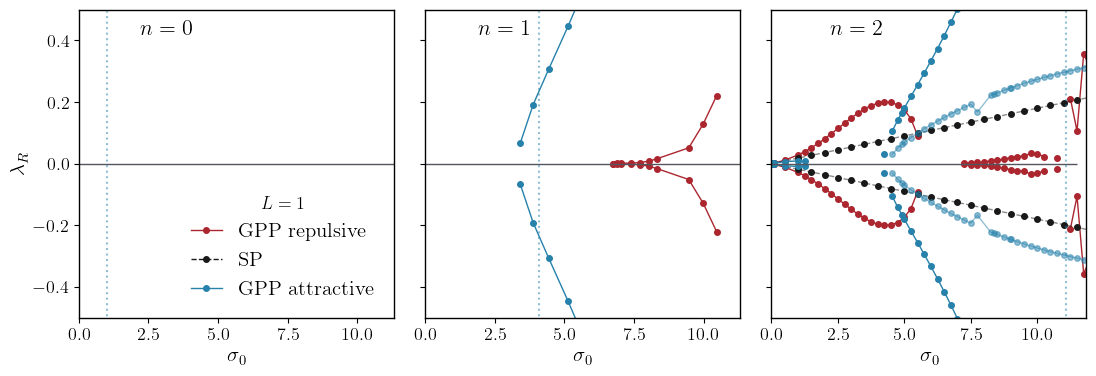

In [65]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.1))

####
#datn01, datn02, Mdatn01, Mdatn02 = datoejes(Autn0, datan0)
#datn01P, datn02P, Mdatn01P, Mdatn02P = datoejes(Autn0P, datan0P)
datn01N, datn02N, Mdatn01N, Mdatn02N = datoejes(Autn0NL1, datan0NL1)

datn01N = np.array(datn01N)
datn02N = np.array(datn02N)
Mdatn01N = np.array(Mdatn01N)
Mdatn02N = np.array(Mdatn02N)

ax[0].plot(datn01N[:, 0], datn01N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[0].plot(datn02N[:, 0], datn02N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[0].plot(Mdatn01N[:, 0], Mdatn01N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[0].plot(Mdatn02N[:, 0], Mdatn02N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)

ax[0].plot([], [], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1, label=r'GPP repulsive') 
ax[0].plot([], [], lw=1, ls='--', color=col[0], marker='o', markersize=4, alpha=1, label=r'SP')
ax[0].plot([], [], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1, label=r'GPP attractive')

############################
datn11P, datn12P, Mdatn11P, Mdatn12P = datoejes(Autn1PL1, datan1PL1)
datn11, datn12, Mdatn11, Mdatn12 = datoejes(Autn1L1, datan1L1)
datn11N, datn12N, Mdatn11N, Mdatn12N = datoejes(Autn1NL1C, datan1NL1)

##
datn11P = np.array(datn11P)
datn12P = np.array(datn12P)
Mdatn11P = np.array(Mdatn11P)
Mdatn12P = np.array(Mdatn12P)

ax[1].plot(datn11P[:, 0], datn11P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12P[:, 0], datn12P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11P[:, 0], Mdatn11P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12P[:, 0], Mdatn12P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)

##
datn11 = np.array(datn11)
datn12 = np.array(datn12)
Mdatn11 = np.array(Mdatn11)
Mdatn12 = np.array(Mdatn12)

ax[1].plot(datn11[:, 0], datn11[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12[:, 0], datn12[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11[:, 0], Mdatn11[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12[:, 0], Mdatn12[:, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)

##
datn11N = np.array(datn11N)
datn12N = np.array(datn12N)
Mdatn11N = np.array(Mdatn11N)
Mdatn12N = np.array(Mdatn12N)

ax[1].plot(datn11N[:, 0], datn11N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[1].plot(datn12N[:, 0], datn12N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[1].plot(Mdatn11N[:, 0], Mdatn11N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[1].plot(Mdatn12N[:, 0], Mdatn12N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)

############################
#datn21P, datn22P, Mdatn21P, Mdatn22P = datoejes(Autn2PL1, datan2PL1)
datn21P, datn22P, Mdatn21P, Mdatn22P = datoejes(Autn2PL1Ex, datan2PL1Ex)
datn21, datn22, Mdatn21, Mdatn22 = datoejes(Autn2L1, datan2L1)
datn21N, datn22N, Mdatn21N, Mdatn22N = datoejes(Autn2NL1, datan2NL1)
#datn21N, datn22N, datn23N, Mdatn21N, Mdatn22N, Mdatn23N = datoejes(Autn2NL1, datan2NL1, out=3)


##
datn21P = np.array(datn21P)
datn22P = np.array(datn22P)
Mdatn21P = np.array(Mdatn21P)
Mdatn22P = np.array(Mdatn22P)

ax[2].plot(datn21P[:, 0], datn21P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22P[:, 0], datn22P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21P[:, 0], Mdatn21P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22P[:, 0], Mdatn22P[:, 1], lw=1, ls='-', color=col[3], marker='o', markersize=4, alpha=1)

##
datn21 = np.array(datn21)
datn22 = np.array(datn22)
Mdatn21 = np.array(Mdatn21)
Mdatn22 = np.array(Mdatn22)

ax[2].plot(datn21[::2, 0], datn21[::2, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22[::2, 0], datn22[::2, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21[::2, 0], Mdatn21[::2, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22[::2, 0], Mdatn22[::2, 1], lw=1, ls=' ', color=col[0], marker='o', markersize=4, alpha=1)
# escalamiento
ax[2].plot(datosEsca1[:, 0], np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)
ax[2].plot(datosEsca1[:, 0], -np.real(datosEsca1[:,1]), ls='--', lw=1, c=col[0], alpha=0.5)

##
datn21N = np.array(datn21N)
datn22N = np.array(datn22N)
Mdatn21N = np.array(Mdatn21N)
Mdatn22N = np.array(Mdatn22N)

ax[2].plot(datn21N[:, 0], datn21N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[2].plot(datn22N[:, 0], datn22N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)
ax[2].plot(Mdatn21N[:, 0], Mdatn21N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=0.5)
ax[2].plot(Mdatn22N[:, 0], Mdatn22N[:, 1], lw=1, ls='-', color=col[2], marker='o', markersize=4, alpha=1)


############################
ax[0].set_xlim(0, 11.3)
ax[1].set_xlim(0, 11.3)
ax[2].set_xlim(0, 11.85)
ax[0].set_ylim(-0.5, 0.5)

ax[0].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')
ax[1].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')
ax[2].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')

ax[0].legend(loc='lower right', frameon=False, title=r'$L=1$')

ax[0].set_ylabel(r'$\lambda_{R}$')
ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')
ax[2].set_xlabel(r'$\sigma_0$')

####
ax[0].text(x=2.2, y=0.42, s=r'$n=0$')
ax[1].text(x=1.9, y=0.42, s=r'$n=1$')
ax[2].text(x=2.2, y=0.42, s=r'$n=2$')

ax[0].vlines(x=1.0, ymin=-5, ymax=5, ls=':', lw=1.5, color=col[2], alpha=0.5)
ax[1].vlines(x=4.1, ymin=-5, ymax=5, ls=':', lw=1.5, color=col[2], alpha=0.5)
ax[2].vlines(x=11.1, ymin=-5, ymax=5, ls=':', lw=1.5, color=col[2], alpha=0.5)

In [25]:
fig.savefig('2lambRealL1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [14]:
def limites(data):
    Ncasos = len(data)
    rangos = []
    for i in range(Ncasos):
        temp = data[i][0]
        test = data[i][1]
        if test is not None:
            rangos.append(temp)
        else:
            rangos.append(None)

    rangofinal = [rangos[0]]
    k = type(rangos[0])
    for i in range(1, Ncasos):
        if type(rangos[i]) is k:
            if i==Ncasos-1:
                rangofinal.append(rangos[i])
            else:
                pass
        else:
            rangofinal.append(rangos[i-1])
            rangofinal.append(rangos[i])
            k = type(rangos[i])

    return rangofinal

def columloca(ax, columdata, color, columNumb=1, height=0.5):
    loc = (2*columNumb-1)*(height/2)
    ncol = len(columdata)
    starts = None
    for i in range(ncol):
        dat = columdata[i]
        widths = None if starts is None else dat-starts
        starts = dat if starts is None else starts
        #print(starts, widths)  
        if widths is not None:
            ax.barh([loc], widths, left=starts, height=height, color=color,
                    edgecolor='black',
                    linewidth=0.5,
                    ls='-',
                    #hatch='/',
                    alpha=0.85)
            starts = None
    
    return ax

In [15]:
# Datos a plotear n=0
datn01PL0, datn02PL0, _, _ = datoejes(Autn0P, datan0P)
datn01PL1, datn02PL1, _, _ = datoejes(Autn0PL1, datan0PL1)
datn01PL2, datn02PL2, _, _ = datoejes(Autn0PL2, datan0PL2)
datn01PL3, datn02PL3, _, _ = datoejes(Autn0PL3, datan0PL3)
datn01PL4, datn02PL4, _, _ = datoejes(Autn0PL4, datan0PL4)
datn01PL5, datn02PL5, _, _ = datoejes(Autn0PL5, datan0PL5)
datn01PL6, datn02PL6, _, _ = datoejes(Autn0PL6, datan0PL6)
datn01PL7, datn02PL7, _, _ = datoejes(Autn0PL7, datan0PL7)
datn01PL8, datn02PL8, _, _ = datoejes(Autn0PL8, datan0PL8)

n0column11 = limites(datn01PL0)
n0column12 = limites(datn02PL0)

n0column21 = limites(datn01PL1)
n0column22 = limites(datn02PL1)

n0column31 = limites(datn01PL2)
n0column32 = limites(datn02PL2)

n0column41 = limites(datn01PL3)
n0column42 = limites(datn02PL3)

n0column51 = limites(datn01PL4)
n0column52 = limites(datn02PL4)

n0column61 = limites(datn01PL5)
n0column62 = limites(datn02PL5)

n0column71 = limites(datn01PL6)
n0column72 = limites(datn02PL6)

n0column81 = limites(datn01PL7)
n0column82 = limites(datn02PL7)

n0column91 = limites(datn01PL8)
n0column92 = limites(datn02PL8)

In [16]:
# Datos a plotear n=1
datn11PL0, datn12PL0, _, _ = datoejes(Autn1P, datan1P)
datn11PL1, datn12PL1, _, _ = datoejes(Autn1PL1, datan1PL1)
datn11PL2, datn12PL2, _, _ = datoejes(Autn1PL2, datan1PL2)
datn11PL3, datn12PL3, _, _ = datoejes(Autn1PL3, datan1PL3)
datn11PL4, datn12PL4, _, _ = datoejes(Autn1PL4, datan1PL4)
datn11PL5, datn12PL5, _, _ = datoejes(Autn1PL5, datan1PL5)
datn11PL6, datn12PL6, _, _ = datoejes(Autn1PL6, datan1PL6)
datn11PL7, datn12PL7, _, _ = datoejes(Autn1PL7, datan1PL7)
datn11PL8, datn12PL8, _, _ = datoejes(Autn1PL8, datan1PL8)
datn11PL9, datn12PL9, _, _ = datoejes(Autn1PL9, datan1PL9)
datn11PL10, datn12PL10, _, _ = datoejes(Autn1PL10, datan1PL10)
datn11PL11, datn12PL11, _, _ = datoejes(Autn1PL11, datan1PL11)
datn11PL12, datn12PL12, _, _ = datoejes(Autn1PL12, datan1PL12)

n1column11 = limites(datn11PL0)
n1column12 = limites(datn12PL0)

n1column21 = limites(datn11PL1)
n1column22 = limites(datn12PL1)

n1column31 = limites(datn11PL2)
n1column32 = limites(datn12PL2)

n1column41 = limites(datn11PL3)
n1column42 = limites(datn12PL3)

n1column51 = limites(datn11PL4)
n1column52 = limites(datn12PL4)

n1column61 = limites(datn11PL5)
n1column62 = limites(datn12PL5)

n1column71 = limites(datn11PL6)
n1column72 = limites(datn12PL6)

n1column81 = limites(datn11PL7)
n1column82 = limites(datn12PL7)

n1column91 = limites(datn11PL8)
n1column92 = limites(datn12PL8)

n1column101 = limites(datn11PL9)
n1column102 = limites(datn12PL9)

n1column111 = limites(datn11PL10)
n1column112 = limites(datn12PL10)

n1column121 = limites(datn11PL11)
n1column122 = limites(datn12PL11)

n1column131 = limites(datn11PL12)
n1column132 = limites(datn12PL12)

In [17]:
# Datos a plotear n=2
datn21PL0, datn22PL0, _, _ = datoejes(Autn2P, datan2P)
datn21PL1, datn22PL1, _, _ = datoejes(Autn2PL1, datan2PL1)
datn21PL2, datn22PL2, _, _ = datoejes(Autn2PL2, datan2PL2)
datn21PL3, datn22PL3, _, _ = datoejes(Autn2PL3, datan2PL3)
datn21PL4, datn22PL4, _, _ = datoejes(Autn2PL4, datan2PL4)
datn21PL5, datn22PL5, _, _ = datoejes(Autn2PL5, datan2PL5)
datn21PL6, datn22PL6, _, _ = datoejes(Autn2PL6, datan2PL6)
datn21PL7, datn22PL7, _, _ = datoejes(Autn2PL7, datan2PL7)
datn21PL8, datn22PL8, _, _ = datoejes(Autn2PL8, datan2PL8)
datn21PL9, datn22PL9, _, _ = datoejes(Autn2PL9, datan2PL9)
datn21PL10, datn22PL10, _, _ = datoejes(Autn2PL10, datan2PL10)
datn21PL11, datn22PL11, _, _ = datoejes(Autn2PL11, datan2PL11)
datn21PL12, datn22PL12, _, _ = datoejes(Autn2PL12, datan2PL12)

n2column11 = limites(datn21PL0)
n2column12 = limites(datn22PL0)

n2column21 = limites(datn21PL1)
n2column22 = limites(datn22PL1)

n2column31 = limites(datn21PL2)
n2column32 = limites(datn22PL2)

n2column41 = limites(datn21PL3)
n2column42 = limites(datn22PL3)

n2column51 = limites(datn21PL4)
n2column52 = limites(datn22PL4)

n2column61 = limites(datn21PL5)
n2column62 = limites(datn22PL5)

n2column71 = limites(datn21PL6)
n2column72 = limites(datn22PL6)

n2column81 = limites(datn21PL7)
n2column82 = limites(datn22PL7)

n2column91 = limites(datn21PL8)
n2column92 = limites(datn22PL8)

n2column101 = limites(datn21PL9)
n2column102 = limites(datn22PL9)

n2column111 = limites(datn21PL10)
n2column112 = limites(datn22PL10)

n2column121 = limites(datn21PL11)
n2column122 = limites(datn22PL11)

n2column131 = limites(datn21PL12)
n2column132 = limites(datn22PL12)

In [18]:
n1column12

[4.954509408072738e-05,
 1.5117311258028474,
 None,
 None,
 6.745214862704277,
 10.46418764571049]

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_23954/1136853768.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),


Text(1.58, 1.9, 'stable band')

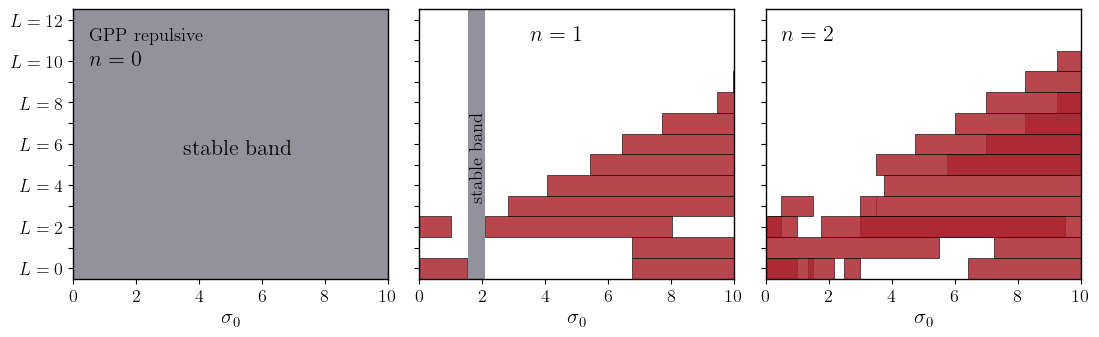

In [18]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

#Lvalores = [r'$L=0$', r'$L=1$', r'$L=2$', r'$L=3$', r'$L=4$', r'$L=5$', r'$L=6$', r'$L=7$', r'$L=8$', r'$L=9$', r'$L=10$', r'$L=11$', r'$L=12$']
Lvalores = [r'$L=0$', r'', r'$L=2$', r'', r'$L=4$', r'', r'$L=6$', r'', r'$L=8$', r'', r'$L=10$', r'', r'$L=12$']

height = 0.5

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.1))

##### n=0 
columloca(ax[0], n0column12, columNumb=1, color=col[3], height=height) # L=0
columloca(ax[0], n0column22, columNumb=2, color=col[3], height=height) # L=1
columloca(ax[0], n0column32, columNumb=3, color=col[3], height=height) # L=2
columloca(ax[0], n0column42, columNumb=4, color=col[3], height=height) # L=3
columloca(ax[0], n0column52, columNumb=5, color=col[3], height=height) # L=4
columloca(ax[0], n0column62, columNumb=6, color=col[3], height=height) # L=5
columloca(ax[0], n0column72, columNumb=7, color=col[3], height=height) # L=6
columloca(ax[0], n0column82, columNumb=8, color=col[3], height=height) # L=7
columloca(ax[0], n0column92, columNumb=9, color=col[3], height=height) # L=8
ax[0].barh([0.7], 0, left=0, height=0, edgecolor='black', 
           color=col[3], label=r'$\lambda_{R}$ of GPP repulsive')

##### n=1 
columloca(ax[1], n1column12, columNumb=1, color=col[3], height=height) # L=0
columloca(ax[1], n1column22, columNumb=2, color=col[3], height=height) # L=1
columloca(ax[1], n1column32, columNumb=3, color=col[3], height=height) # L=2
columloca(ax[1], n1column42, columNumb=4, color=col[3], height=height) # L=3
columloca(ax[1], n1column52, columNumb=5, color=col[3], height=height) # L=4
columloca(ax[1], n1column62, columNumb=6, color=col[3], height=height) # L=5
columloca(ax[1], n1column72, columNumb=7, color=col[3], height=height) # L=6
columloca(ax[1], n1column82, columNumb=8, color=col[3], height=height) # L=7
columloca(ax[1], n1column92, columNumb=9, color=col[3], height=height) # L=8
columloca(ax[1], n1column102, columNumb=10, color=col[3], height=height) # L=9
columloca(ax[1], n1column112, columNumb=11, color=col[3], height=height) # L=10
columloca(ax[1], n1column122, columNumb=12, color=col[3], height=height) # L=11
columloca(ax[1], n1column132, columNumb=13, color=col[3], height=height) # L=12
  
##### n=2
columloca(ax[2], n2column11, columNumb=1, color=col[3], height=height)  # L=0
columloca(ax[2], n2column12, columNumb=1, color=col[3], height=height)  # L=0

columloca(ax[2], n2column21, columNumb=2, color=col[3], height=height)  # L=1
columloca(ax[2], n2column22, columNumb=2, color=col[3], height=height)  # L=1

columloca(ax[2], n2column31, columNumb=3, color=col[3], height=height)  # L=2
columloca(ax[2], n2column32, columNumb=3, color=col[3], height=height)  # L=2

columloca(ax[2], n2column41, columNumb=4, color=col[3], height=height)  # L=3
columloca(ax[2], n2column42, columNumb=4, color=col[3], height=height)  # L=3

columloca(ax[2], n2column51, columNumb=5, color=col[3], height=height)  # L=4
columloca(ax[2], n2column52, columNumb=5, color=col[3], height=height)  # L=4

columloca(ax[2], n2column61, columNumb=6, color=col[3], height=height)  # L=5
columloca(ax[2], n2column62, columNumb=6, color=col[3], height=height)  # L=5

columloca(ax[2], n2column71, columNumb=7, color=col[3], height=height)  # L=6
columloca(ax[2], n2column72, columNumb=7, color=col[3], height=height)  # L=6

columloca(ax[2], n2column81, columNumb=8, color=col[3], height=height)  # L=7
columloca(ax[2], n2column82, columNumb=8, color=col[3], height=height)  # L=7

columloca(ax[2], n2column91, columNumb=9, color=col[3], height=height)  # L=8
columloca(ax[2], n2column92, columNumb=9, color=col[3], height=height)  # L=8

columloca(ax[2], n2column101, columNumb=10, color=col[3], height=height)  # L=9
columloca(ax[2], n2column102, columNumb=10, color=col[3], height=height)  # L=9

columloca(ax[2], n2column111, columNumb=11, color=col[3], height=height)  # L=10
columloca(ax[2], n2column112, columNumb=11, color=col[3], height=height)  # L=10

columloca(ax[2], n2column121, columNumb=12, color=col[3], height=height)  # L=11
columloca(ax[2], n2column122, columNumb=12, color=col[3], height=height)  # L=11

columloca(ax[2], n2column131, columNumb=13, color=col[3], height=height)  # L=12
columloca(ax[2], n2column132, columNumb=13, color=col[3], height=height)  # L=12


##############
NumL = len(Lvalores)
yloc = [(2*i-1)*(height/2) for i in range(1, NumL+1)]
ax[1].set_yticks(ticks=yloc, labels=Lvalores)

ax[1].set_ylim(0, max(yloc)+height/2) 
ax[0].set_xlim(0, 10) 
ax[1].set_xlim(0, 10) 
ax[2].set_xlim(0, 10) 

ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')
ax[2].set_xlabel(r'$\sigma_0$')

####
ax[0].text(x=0.5, y=yloc[-3]-0.1, s=r'$n=0$')
ax[0].text(x=0.5, y=yloc[-2], s=r'GPP repulsive', fontsize='small')
ax[1].text(x=3.5, y=yloc[-2], s=r'$n=1$')
ax[2].text(x=0.5, y=yloc[-2], s=r'$n=2$')

ax[0].axvspan(0, 10, facecolor='#656473', alpha=0.7)
ax[1].axvspan(1.55, 2.07, facecolor='#656473', alpha=0.7)

ax[0].text(3.5, 3., s=r'stable band', rotation='horizontal')#, fontsize='small'
ax[1].text(1.58, 1.9, s=r'stable band', rotation='vertical', fontsize='small')

#ax[0].legend(loc='lower right', frameon=False)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_33971/3779960104.py:10: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),


Text(0, 0.5, '$L$')

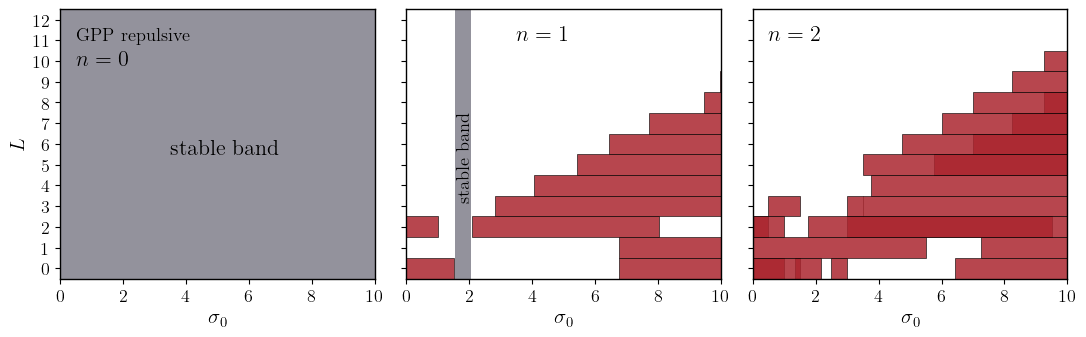

In [19]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

#Lvalores = [r'$L=0$', r'$L=1$', r'$L=2$', r'$L=3$', r'$L=4$', r'$L=5$', r'$L=6$', r'$L=7$', r'$L=8$', r'$L=9$', r'$L=10$', r'$L=11$', r'$L=12$']
#Lvalores = [r'$L=0$', r'', r'$L=2$', r'', r'$L=4$', r'', r'$L=6$', r'', r'$L=8$', r'', r'$L=10$', r'', r'$L=12$']
Lvalores = [r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$6$', r'$7$', r'$8$', r'$9$', r'$10$', r'$11$', r'$12$']

height = 0.5

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.1))

##### n=0 
columloca(ax[0], n0column12, columNumb=1, color=col[3], height=height) # L=0
columloca(ax[0], n0column22, columNumb=2, color=col[3], height=height) # L=1
columloca(ax[0], n0column32, columNumb=3, color=col[3], height=height) # L=2
columloca(ax[0], n0column42, columNumb=4, color=col[3], height=height) # L=3
columloca(ax[0], n0column52, columNumb=5, color=col[3], height=height) # L=4
columloca(ax[0], n0column62, columNumb=6, color=col[3], height=height) # L=5
columloca(ax[0], n0column72, columNumb=7, color=col[3], height=height) # L=6
columloca(ax[0], n0column82, columNumb=8, color=col[3], height=height) # L=7
columloca(ax[0], n0column92, columNumb=9, color=col[3], height=height) # L=8
ax[0].barh([0.7], 0, left=0, height=0, edgecolor='black', 
           color=col[3], label=r'$\lambda_{R}$ of GPP repulsive')

##### n=1 
columloca(ax[1], n1column12, columNumb=1, color=col[3], height=height) # L=0
columloca(ax[1], n1column22, columNumb=2, color=col[3], height=height) # L=1
columloca(ax[1], n1column32, columNumb=3, color=col[3], height=height) # L=2
columloca(ax[1], n1column42, columNumb=4, color=col[3], height=height) # L=3
columloca(ax[1], n1column52, columNumb=5, color=col[3], height=height) # L=4
columloca(ax[1], n1column62, columNumb=6, color=col[3], height=height) # L=5
columloca(ax[1], n1column72, columNumb=7, color=col[3], height=height) # L=6
columloca(ax[1], n1column82, columNumb=8, color=col[3], height=height) # L=7
columloca(ax[1], n1column92, columNumb=9, color=col[3], height=height) # L=8
columloca(ax[1], n1column102, columNumb=10, color=col[3], height=height) # L=9
columloca(ax[1], n1column112, columNumb=11, color=col[3], height=height) # L=10
columloca(ax[1], n1column122, columNumb=12, color=col[3], height=height) # L=11
columloca(ax[1], n1column132, columNumb=13, color=col[3], height=height) # L=12
  
##### n=2
columloca(ax[2], n2column11, columNumb=1, color=col[3], height=height)  # L=0
columloca(ax[2], n2column12, columNumb=1, color=col[3], height=height)  # L=0

columloca(ax[2], n2column21, columNumb=2, color=col[3], height=height)  # L=1
columloca(ax[2], n2column22, columNumb=2, color=col[3], height=height)  # L=1

columloca(ax[2], n2column31, columNumb=3, color=col[3], height=height)  # L=2
columloca(ax[2], n2column32, columNumb=3, color=col[3], height=height)  # L=2

columloca(ax[2], n2column41, columNumb=4, color=col[3], height=height)  # L=3
columloca(ax[2], n2column42, columNumb=4, color=col[3], height=height)  # L=3

columloca(ax[2], n2column51, columNumb=5, color=col[3], height=height)  # L=4
columloca(ax[2], n2column52, columNumb=5, color=col[3], height=height)  # L=4

columloca(ax[2], n2column61, columNumb=6, color=col[3], height=height)  # L=5
columloca(ax[2], n2column62, columNumb=6, color=col[3], height=height)  # L=5

columloca(ax[2], n2column71, columNumb=7, color=col[3], height=height)  # L=6
columloca(ax[2], n2column72, columNumb=7, color=col[3], height=height)  # L=6

columloca(ax[2], n2column81, columNumb=8, color=col[3], height=height)  # L=7
columloca(ax[2], n2column82, columNumb=8, color=col[3], height=height)  # L=7

columloca(ax[2], n2column91, columNumb=9, color=col[3], height=height)  # L=8
columloca(ax[2], n2column92, columNumb=9, color=col[3], height=height)  # L=8

columloca(ax[2], n2column101, columNumb=10, color=col[3], height=height)  # L=9
columloca(ax[2], n2column102, columNumb=10, color=col[3], height=height)  # L=9

columloca(ax[2], n2column111, columNumb=11, color=col[3], height=height)  # L=10
columloca(ax[2], n2column112, columNumb=11, color=col[3], height=height)  # L=10

columloca(ax[2], n2column121, columNumb=12, color=col[3], height=height)  # L=11
columloca(ax[2], n2column122, columNumb=12, color=col[3], height=height)  # L=11

columloca(ax[2], n2column131, columNumb=13, color=col[3], height=height)  # L=12
columloca(ax[2], n2column132, columNumb=13, color=col[3], height=height)  # L=12


##############
NumL = len(Lvalores)
yloc = [(2*i-1)*(height/2) for i in range(1, NumL+1)]
ax[1].set_yticks(ticks=yloc, labels=Lvalores)

ax[1].set_ylim(0, max(yloc)+height/2) 
ax[0].set_xlim(0, 10) 
ax[1].set_xlim(0, 10) 
ax[2].set_xlim(0, 10) 

ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')
ax[2].set_xlabel(r'$\sigma_0$')

####
ax[0].text(x=0.5, y=yloc[-3]-0.1, s=r'$n=0$')
ax[0].text(x=0.5, y=yloc[-2], s=r'GPP repulsive', fontsize='small')
ax[1].text(x=3.5, y=yloc[-2], s=r'$n=1$')
ax[2].text(x=0.5, y=yloc[-2], s=r'$n=2$')

ax[0].axvspan(0, 10, facecolor='#656473', alpha=0.7)
ax[1].axvspan(1.55, 2.07, facecolor='#656473', alpha=0.7)

ax[0].text(3.5, 3., s=r'stable band', rotation='horizontal')#, fontsize='small'
ax[1].text(1.58, 1.9, s=r'stable band', rotation='vertical', fontsize='small')

#ax[0].legend(loc='lower right', frameon=False)
ax[0].set_ylabel(r'$L$')

In [20]:
fig.savefig('lambRealP_L.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [21]:
# negativo

# n0
Mdatan0L0, MAutn0L0 = np.load('AutovN0M.npy', allow_pickle=True)
Mdatan0L02, MAutn0L02 = np.load('AutovN0ML0_2.npy', allow_pickle=True)
Mdatan0L1, MAutn0L1 = np.load('AutovN0ML1.npy', allow_pickle=True)
Mdatan0L2, MAutn0L2 = np.load('AutovN0ML2.npy', allow_pickle=True)
Mdatan0L3, MAutn0L3 = np.load('AutovN0ML3.npy', allow_pickle=True)

# n1
Mdatan1L0, MAutn1L0 = np.load('AutovN1M.npy', allow_pickle=True)
Mdatan1L02, MAutn1L02 = np.load('AutovN1ML0_2.npy', allow_pickle=True)
Mdatan1L1, MAutn1L1 = np.load('AutovN1ML1.npy', allow_pickle=True)
Mdatan1L12, MAutn1L12 = np.load('AutovN1ML1_2.npy', allow_pickle=True)
Mdatan1L2, MAutn1L2 = np.load('AutovN1ML2.npy', allow_pickle=True)
Mdatan1L22, MAutn1L22 = np.load('AutovN1ML2_2.npy', allow_pickle=True)
Mdatan1L3, MAutn1L3 = np.load('AutovN1ML3.npy', allow_pickle=True)
#Mdatan1L32, MAutn1L32 = np.load('AutovN1ML3_2.npy', allow_pickle=True)
Mdatan1L4, MAutn1L4 = np.load('AutovN1ML4.npy', allow_pickle=True)
Mdatan1L5, MAutn1L5 = np.load('AutovN1ML5.npy', allow_pickle=True)
Mdatan1L6, MAutn1L6 = np.load('AutovN1ML6.npy', allow_pickle=True)

# n2
Mdatan2L0, MAutn2L0 = np.load('AutovN2M.npy', allow_pickle=True)
Mdatan2L02, MAutn2L02 = np.load('AutovN2ML0_2.npy', allow_pickle=True)
Mdatan2L1, MAutn2L1 = np.load('AutovN2ML1.npy', allow_pickle=True)
Mdatan2L12, MAutn2L12 = np.load('AutovN2ML1_2.npy', allow_pickle=True)
Mdatan2L2, MAutn2L2 = np.load('AutovN2ML2.npy', allow_pickle=True)
Mdatan2L22, MAutn2L22 = np.load('AutovN2ML2_2.npy', allow_pickle=True)
Mdatan2L3, MAutn2L3 = np.load('AutovN2ML3.npy', allow_pickle=True)
Mdatan2L4, MAutn2L4 = np.load('AutovN2ML4.npy', allow_pickle=True)
Mdatan2L5, MAutn2L5 = np.load('AutovN2ML5.npy', allow_pickle=True)

In [22]:
Mdatan0L02 = list(Mdatan0L02)
Mdatan0L02.append(5.0)
MAutn0L02 = list(MAutn0L02)
MAutn0L02.append([0.2+0.1j])

In [23]:
Mdatan2L0v2 = np.concatenate([Mdatan2L0[:60], Mdatan2L02[9:]])
MAutn2L0v2 = np.concatenate([MAutn2L0[:60], MAutn2L02[9:]])

Mdatan2L1v2 = np.concatenate([Mdatan2L1[:10], Mdatan2L12[10:]])
MAutn2L1v2 = np.concatenate([MAutn2L1[:10], MAutn2L12[10:]])
MAutn2L1v2[24] = []

In [24]:
Mdatan1L0v2 = np.concatenate([Mdatan1L0[:-21], Mdatan1L02])
MAutn1L0v2 = np.concatenate([MAutn1L0[:-21], MAutn1L02])

Mdatan1L1v2 = np.concatenate([Mdatan1L1[:-20], Mdatan1L12])
MAutn1L1v2 = np.concatenate([MAutn1L1[:-20], MAutn1L12])

Mdatan1L2v2 =np.concatenate([Mdatan1L2[:-20], Mdatan1L22])
MAutn1L2v2 = np.concatenate([MAutn1L2[:-20], MAutn1L22])

In [25]:
# Datos a plotear n=0
datn01ML0, datn02ML0, _, _ = datoejes(MAutn0L0, Mdatan0L0[:-2])
datn01ML02, datn02ML02, _, _ = datoejes(MAutn0L02, Mdatan0L02)
datn01ML1, datn02ML1, _, _ = datoejes(MAutn0L1, Mdatan0L1)
datn01ML2, datn02ML2, _, _ = datoejes(MAutn0L2, Mdatan0L2)
datn01ML3, datn02ML3, _, _ = datoejes(MAutn0L3, Mdatan0L3)

datn01ML0v2 = np.concatenate([datn01ML0, datn01ML02])
datn02ML0v2 = np.concatenate([datn02ML0, datn02ML02])

n0column11 = limites(datn01ML0v2)
n0column12 = limites(datn02ML0v2)

n0column21 = limites(datn01ML1)
n0column22 = limites(datn02ML1)

n0column31 = limites(datn01ML2)
n0column32 = limites(datn02ML2)

n0column41 = limites(datn01ML3)
n0column42 = limites(datn02ML3)

In [26]:
# Datos a plotear n=1
#datn11ML0, datn12ML0, _, _ = datoejes(MAutn1L0, Mdatan1L0)
datn11ML0, datn12ML0, _, _ = datoejes(MAutn1L0v2, Mdatan1L0v2)
datn11ML1, datn12ML1, _, _ = datoejes(MAutn1L1v2, Mdatan1L1v2)
datn11ML2, datn12ML2, _, _ = datoejes(MAutn1L2v2, Mdatan1L2v2)
datn11ML3, datn12ML3, _, _ = datoejes(MAutn1L3, Mdatan1L3)
datn11ML4, datn12ML4, _, _ = datoejes(MAutn1L4, Mdatan1L4)
datn11ML5, datn12ML5, _, _ = datoejes(MAutn1L5, Mdatan1L5)
datn11ML6, datn12ML6, _, _ = datoejes(MAutn1L6, Mdatan1L6)


n1column11 = limites(datn11ML0)
n1column12 = limites(datn12ML0)

n1column21 = limites(datn11ML1)
n1column22 = limites(datn12ML1)

n1column31 = limites(datn11ML2)
n1column32 = limites(datn12ML2)

n1column41 = limites(datn11ML3)
n1column42 = limites(datn12ML3)

n1column51 = limites(datn11ML4)
n1column52 = limites(datn12ML4)

n1column61 = limites(datn11ML5)
n1column62 = limites(datn12ML5)

n1column71 = limites(datn11ML6)
n1column72 = limites(datn12ML6)

In [27]:
# Datos a plotear n=2
datn21ML0, datn22ML0, _, _ = datoejes(MAutn2L0v2, Mdatan2L0v2)
datn21ML1, datn22ML1, _, _ = datoejes(MAutn2L1v2, Mdatan2L1v2, dec=8)
datn21ML2, datn22ML2, _, _ = datoejes(MAutn2L2, Mdatan2L2, dec=9)
datn21ML3, datn22ML3, _, _ = datoejes(MAutn2L3, Mdatan2L3, dec=9)
datn21ML4, datn22ML4, _, _ = datoejes(MAutn2L4, Mdatan2L4, dec=9)
datn21ML5, datn22ML5, _, _ = datoejes(MAutn2L5, Mdatan2L5, dec=9)

n2column11 = limites(datn21ML0)
n2column12 = limites(datn22ML0)

n2column21 = limites(datn21ML1)
n2column22 = limites(datn22ML1)

n2column31 = limites(datn21ML2)
n2column32 = limites(datn22ML2)

n2column41 = limites(datn21ML3)
n2column42 = limites(datn22ML3)

n2column51 = limites(datn21ML4)
n2column52 = limites(datn22ML4)

n2column61 = limites(datn21ML5)
n2column62 = limites(datn22ML5)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_15446/3809350506.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),


Text(0.45, 1.0, 'stable band')

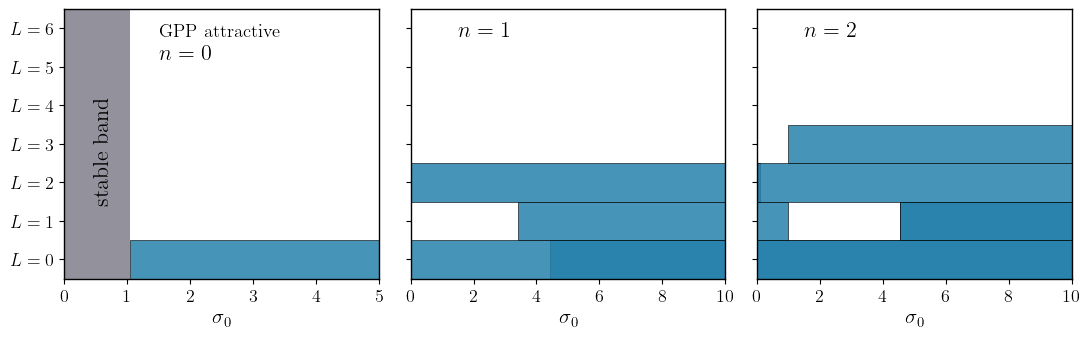

In [34]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Lvalores = [r'$L=0$', r'$L=1$', r'$L=2$', r'$L=3$', r'$L=4$', r'$L=5$', r'$L=6$']
#Lvalores = [r'$L=0$', r'', r'$L=2$', r'', r'$L=4$', r'', r'$L=6$', r'', r'$L=8$', r'', r'$L=10$', r'', r'$L=12$']

height = 0.5

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.1))

##### n=0 
columloca(ax[0], n0column11, columNumb=1, color=col[2], height=height) # L=0
columloca(ax[0], n0column12, columNumb=1, color=col[2], height=height) # L=0

columloca(ax[0], n0column21, columNumb=2, color=col[2], height=height) # L=1
columloca(ax[0], n0column22, columNumb=2, color=col[2], height=height) # L=1

columloca(ax[0], n0column31, columNumb=3, color=col[2], height=height) # L=2
columloca(ax[0], n0column32, columNumb=3, color=col[2], height=height) # L=2

columloca(ax[0], n0column41, columNumb=4, color=col[2], height=height) # L=3
columloca(ax[0], n0column42, columNumb=4, color=col[2], height=height) # L=3

#ax[0].barh([0.7], 0, left=0, height=0, edgecolor='black', 
#           color=col[3], label=r'$\lambda_{R}$ of GPP attractive')

##### n=1 
columloca(ax[1], n1column11, columNumb=1, color=col[2], height=height) # L=0
columloca(ax[1], n1column12, columNumb=1, color=col[2], height=height) # L=0

columloca(ax[1], n1column21, columNumb=2, color=col[2], height=height) # L=1
columloca(ax[1], n1column22, columNumb=2, color=col[2], height=height) # L=1

columloca(ax[1], n1column31, columNumb=3, color=col[2], height=height) # L=2
columloca(ax[1], n1column32, columNumb=3, color=col[2], height=height) # L=2

columloca(ax[1], n1column41, columNumb=4, color=col[2], height=height) # L=3
columloca(ax[1], n1column42, columNumb=4, color=col[2], height=height) # L=3

columloca(ax[1], n1column51, columNumb=5, color=col[2], height=height) # L=4
columloca(ax[1], n1column52, columNumb=5, color=col[2], height=height) # L=4

columloca(ax[1], n1column61, columNumb=6, color=col[2], height=height) # L=5
columloca(ax[1], n1column62, columNumb=6, color=col[2], height=height) # L=5

columloca(ax[1], n1column71, columNumb=6, color=col[2], height=height) # L=6
columloca(ax[1], n1column72, columNumb=6, color=col[2], height=height) # L=6
  
##### n=2
columloca(ax[2], n2column11, columNumb=1, color=col[2], height=height)  # L=0
columloca(ax[2], n2column12, columNumb=1, color=col[2], height=height)  # L=0

columloca(ax[2], n2column21, columNumb=2, color=col[2], height=height)  # L=1
columloca(ax[2], n2column22, columNumb=2, color=col[2], height=height)  # L=1

columloca(ax[2], n2column31, columNumb=3, color=col[2], height=height)  # L=2
columloca(ax[2], n2column32, columNumb=3, color=col[2], height=height)  # L=2

columloca(ax[2], n2column41, columNumb=4, color=col[2], height=height)  # L=3
columloca(ax[2], n2column42, columNumb=4, color=col[2], height=height)  # L=3

columloca(ax[2], n2column51, columNumb=5, color=col[2], height=height)  # L=4
columloca(ax[2], n2column52, columNumb=5, color=col[2], height=height)  # L=4

columloca(ax[2], n2column61, columNumb=6, color=col[2], height=height)  # L=5
columloca(ax[2], n2column62, columNumb=6, color=col[2], height=height)  # L=5
##############
NumL = len(Lvalores)
yloc = [(2*i-1)*(height/2) for i in range(1, NumL+1)]
ax[1].set_yticks(ticks=yloc, labels=Lvalores)

ax[1].set_ylim(0, max(yloc)+height/2) 
ax[0].set_xlim(0, 5) 
ax[1].set_xlim(0, 10) 
ax[2].set_xlim(0, 10) 

ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')
ax[2].set_xlabel(r'$\sigma_0$')

####
ax[0].text(x=1.5, y=yloc[-1]-0.1, s=r'GPP attractive', fontsize='small')
ax[0].text(x=1.5, y=yloc[-2]+0.1, s=r'$n=0$')
ax[1].text(x=1.5, y=yloc[-1]-0.1, s=r'$n=1$')
ax[2].text(x=1.5, y=yloc[-1]-0.1, s=r'$n=2$')

ax[0].axvspan(0, 1.045, facecolor='#656473', alpha=0.7)
#ax[1].axvspan(1.55, 2.07, facecolor='#656473', alpha=0.7)

ax[0].text(0.45, 1., s=r'stable band', rotation='vertical')#, fontsize='small'
#ax[1].text(1.58, 1.9, s=r'Stable Band', rotation='vertical', fontsize='small')

#ax[0].legend(loc='lower right', frameon=False)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_33971/627231829.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),


Text(0, 0.5, '$L$')

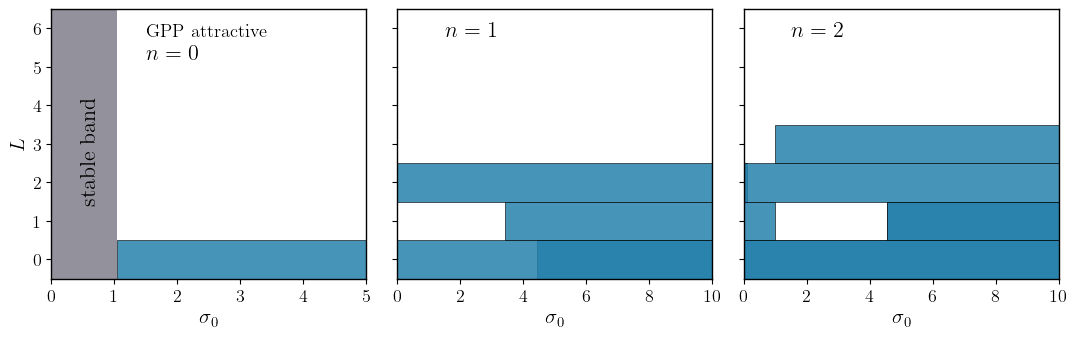

In [28]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Lvalores = [r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$6$']
#Lvalores = [r'$L=0$', r'', r'$L=2$', r'', r'$L=4$', r'', r'$L=6$', r'', r'$L=8$', r'', r'$L=10$', r'', r'$L=12$']

height = 0.5

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.1))

##### n=0 
columloca(ax[0], n0column11, columNumb=1, color=col[2], height=height) # L=0
columloca(ax[0], n0column12, columNumb=1, color=col[2], height=height) # L=0

columloca(ax[0], n0column21, columNumb=2, color=col[2], height=height) # L=1
columloca(ax[0], n0column22, columNumb=2, color=col[2], height=height) # L=1

columloca(ax[0], n0column31, columNumb=3, color=col[2], height=height) # L=2
columloca(ax[0], n0column32, columNumb=3, color=col[2], height=height) # L=2

columloca(ax[0], n0column41, columNumb=4, color=col[2], height=height) # L=3
columloca(ax[0], n0column42, columNumb=4, color=col[2], height=height) # L=3

#ax[0].barh([0.7], 0, left=0, height=0, edgecolor='black', 
#           color=col[3], label=r'$\lambda_{R}$ of GPP attractive')

##### n=1 
columloca(ax[1], n1column11, columNumb=1, color=col[2], height=height) # L=0
columloca(ax[1], n1column12, columNumb=1, color=col[2], height=height) # L=0

columloca(ax[1], n1column21, columNumb=2, color=col[2], height=height) # L=1
columloca(ax[1], n1column22, columNumb=2, color=col[2], height=height) # L=1

columloca(ax[1], n1column31, columNumb=3, color=col[2], height=height) # L=2
columloca(ax[1], n1column32, columNumb=3, color=col[2], height=height) # L=2

columloca(ax[1], n1column41, columNumb=4, color=col[2], height=height) # L=3
columloca(ax[1], n1column42, columNumb=4, color=col[2], height=height) # L=3

columloca(ax[1], n1column51, columNumb=5, color=col[2], height=height) # L=4
columloca(ax[1], n1column52, columNumb=5, color=col[2], height=height) # L=4

columloca(ax[1], n1column61, columNumb=6, color=col[2], height=height) # L=5
columloca(ax[1], n1column62, columNumb=6, color=col[2], height=height) # L=5

columloca(ax[1], n1column71, columNumb=6, color=col[2], height=height) # L=6
columloca(ax[1], n1column72, columNumb=6, color=col[2], height=height) # L=6
  
##### n=2
columloca(ax[2], n2column11, columNumb=1, color=col[2], height=height)  # L=0
columloca(ax[2], n2column12, columNumb=1, color=col[2], height=height)  # L=0

columloca(ax[2], n2column21, columNumb=2, color=col[2], height=height)  # L=1
columloca(ax[2], n2column22, columNumb=2, color=col[2], height=height)  # L=1

columloca(ax[2], n2column31, columNumb=3, color=col[2], height=height)  # L=2
columloca(ax[2], n2column32, columNumb=3, color=col[2], height=height)  # L=2

columloca(ax[2], n2column41, columNumb=4, color=col[2], height=height)  # L=3
columloca(ax[2], n2column42, columNumb=4, color=col[2], height=height)  # L=3

columloca(ax[2], n2column51, columNumb=5, color=col[2], height=height)  # L=4
columloca(ax[2], n2column52, columNumb=5, color=col[2], height=height)  # L=4

columloca(ax[2], n2column61, columNumb=6, color=col[2], height=height)  # L=5
columloca(ax[2], n2column62, columNumb=6, color=col[2], height=height)  # L=5
##############
NumL = len(Lvalores)
yloc = [(2*i-1)*(height/2) for i in range(1, NumL+1)]
ax[1].set_yticks(ticks=yloc, labels=Lvalores)

ax[1].set_ylim(0, max(yloc)+height/2) 
ax[0].set_xlim(0, 5) 
ax[1].set_xlim(0, 10) 
ax[2].set_xlim(0, 10) 

ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')
ax[2].set_xlabel(r'$\sigma_0$')

####
ax[0].text(x=1.5, y=yloc[-1]-0.1, s=r'GPP attractive', fontsize='small')
ax[0].text(x=1.5, y=yloc[-2]+0.1, s=r'$n=0$')
ax[1].text(x=1.5, y=yloc[-1]-0.1, s=r'$n=1$')
ax[2].text(x=1.5, y=yloc[-1]-0.1, s=r'$n=2$')

ax[0].axvspan(0, 1.045, facecolor='#656473', alpha=0.7)
#ax[1].axvspan(1.55, 2.07, facecolor='#656473', alpha=0.7)

ax[0].text(0.45, 1., s=r'stable band', rotation='vertical')#, fontsize='small'
#ax[1].text(1.58, 1.9, s=r'Stable Band', rotation='vertical', fontsize='small')

ax[0].set_ylabel(r'$L$')
#ax[0].legend(loc='lower right', frameon=False)

In [29]:
fig.savefig('lambRealN_L.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [24]:
n2column31, n2column32

([None, None, 0.05, 0.1, None, None, 10.75, 15.75], [1e-05, 15.75])